In [3]:
import numpy as np
import pandas as pd

from pandas.api.types import is_numeric_dtype
from pandas.plotting import scatter_matrix

from resources.properties import PATH_TRAIN, PATH_TEST

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 12.0)

# Data Exploration
### The presetn notebook intents to explore the dataset provided by Tecnatom. The exploration would be performed as following:
1. Load data.
2. Basic and general look: the first step it's to take a look into the data is structure by using some basic pandas' function.
3. Null values check: then it's going to be check is the dataset contain any null value, how many of them are, where are located, and how mnay rows and columns affect.
4. Basic Visualization

---
## 1. Load data

In [4]:
df_train = pd.read_csv(PATH_TRAIN, index_col=0)
df_test = pd.read_csv(PATH_TEST, index_col=0)

---
## 2. Basic and general look

In [5]:
df_train.head()

,PanelA,PanelB,PanelC,PanelD,PanelE,PanelF,PanelG,PanelH,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Target
ID,,,,,,,,,,,,,,,,,
0,A,A,A,B,B,B,B,A,25.93,1.61,102.08,3.00,3.00,1.02,0.03,1.00,4
1,B,A,A,B,B,B,B,A,24.63,1.83,120.98,2.64,3.00,2.74,2.00,0.50,3
2,A,A,A,B,B,B,B,A,25.99,1.66,105.12,3.00,3.00,1.63,0.01,0.41,4
3,B,A,A,B,B,B,B,A,25.04,1.76,88.53,1.97,1.08,2.00,0.00,0.46,6
4,A,A,A,B,B,B,B,C,43.73,1.59,77.00,2.00,3.00,2.81,0.00,0.00,2


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1719 entries, 0 to 1718
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PanelA   1715 non-null   object 
 1   PanelB   1717 non-null   object 
 2   PanelC   1716 non-null   object 
 3   PanelD   1717 non-null   object 
 4   PanelE   1716 non-null   object 
 5   PanelF   1717 non-null   object 
 6   PanelG   1712 non-null   object 
 7   PanelH   1719 non-null   object 
 8   Sensor1  1718 non-null   float64
 9   Sensor2  1717 non-null   float64
 10  Sensor3  1718 non-null   float64
 11  Sensor4  1719 non-null   float64
 12  Sensor5  1718 non-null   float64
 13  Sensor6  1718 non-null   float64
 14  Sensor7  1719 non-null   float64
 15  Sensor8  1718 non-null   float64
 16  Target   1719 non-null   int64  
dtypes: float64(8), int64(1), object(8)
memory usage: 241.7+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 1719 to 2141
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PanelA   423 non-null    object 
 1   PanelB   423 non-null    object 
 2   PanelC   423 non-null    object 
 3   PanelD   423 non-null    object 
 4   PanelE   423 non-null    object 
 5   PanelF   423 non-null    object 
 6   PanelG   423 non-null    object 
 7   PanelH   423 non-null    object 
 8   Sensor1  423 non-null    float64
 9   Sensor2  423 non-null    float64
 10  Sensor3  423 non-null    float64
 11  Sensor4  423 non-null    float64
 12  Sensor5  423 non-null    float64
 13  Sensor6  423 non-null    float64
 14  Sensor7  423 non-null    float64
 15  Sensor8  423 non-null    float64
dtypes: float64(8), object(8)
memory usage: 56.2+ KB


### DataFrame shape

In [8]:
data_shape = {
    'train-data': {
        'rows':df_train.shape[0],
        'columns':df_train.shape[1]
    },
        'test-data': {
        'rows':df_test.shape[0],
        'columns':df_test.shape[1]
    }
}
data_shape

{'train-data': {'rows': 1719, 'columns': 17},
 'test-data': {'rows': 423, 'columns': 16}}

---
## 3. Null values check

In [9]:
# df_train -> Total null values per feature:
df_train.isnull().sum().sort_values(ascending=False)

PanelG     7
PanelA     4
PanelC     3
PanelE     3
PanelB     2
PanelD     2
PanelF     2
Sensor2    2
Sensor1    1
Sensor8    1
Sensor3    1
Sensor5    1
Sensor6    1
PanelH     0
Sensor4    0
Sensor7    0
Target     0
dtype: int64

In [10]:
# df_test -> Total null values per feature:
df_test.isnull().sum()

PanelA     0
PanelB     0
PanelC     0
PanelD     0
PanelE     0
PanelF     0
PanelG     0
PanelH     0
Sensor1    0
Sensor2    0
Sensor3    0
Sensor4    0
Sensor5    0
Sensor6    0
Sensor7    0
Sensor8    0
dtype: int64

In [11]:
# searching for rows where null values are:
mask_null = df_train.isnull().any(axis=1)

# The following rows contain one or more null values; 
# their ID are displayed in order to track them down
df_train_null = df_train[mask_null]
df_train_null

,PanelA,PanelB,PanelC,PanelD,PanelE,PanelF,PanelG,PanelH,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Target
ID,,,,,,,,,,,,,,,,,
1688,A,NaN,B,B,NaN,B,C,B,61.24,1.62,65.06,2.39,1.00,1.44,0.11,2.00,0
1692,NaN,A,A,B,B,A,C,A,21.48,1.69,NaN,3.00,3.18,1.91,1.48,0.63,0
1694,A,A,A,B,NaN,A,C,A,61.58,NaN,79.26,3.00,4.18,2.31,2.00,1.73,0
1696,A,NaN,A,B,B,NaN,A,B,21.48,NaN,51.26,2.60,NaN,1.91,0.68,0.83,3
1698,B,A,B,NaN,B,A,C,A,111.48,1.69,51.26,3.00,5.18,1.91,0.49,0.43,2
1699,B,B,A,B,A,NaN,B,C,78.00,5.89,9.02,3.64,1.80,1.90,1.65,8.36,6
1701,NaN,A,A,B,B,C,A,A,21.48,1.69,67.00,1.00,3.18,3.50,0.48,0.63,1
1703,B,A,NaN,B,B,C,B,A,NaN,1.69,34.00,2.00,6.18,1.20,0.48,1.63,1
1705,B,A,A,B,NaN,B,NaN,A,21.48,1.69,67.00,1.50,3.18,3.40,0.48,0.63,1


In [12]:
# and the pandas series below shows how many null values are in each row
count_null_per_row = lambda x: df_train.shape[1] - x.count()
print(df_train_null.apply(count_null_per_row, axis=1))
print('\n===============\n')
print('Number of rows where null values appear : ', df_train_null.apply(count_null_per_row, axis=1).shape[0])
print('This represent', df_train_null.apply(count_null_per_row, axis=1).shape[0] * 100 / df_train.shape[0], 'percent ')

ID
1688    2
1692    2
1694    2
1696    4
1698    1
1699    1
1701    1
1703    2
1705    2
1707    2
1709    2
1711    3
1713    1
1715    2
1717    3
dtype: int64


Number of rows where null values appear :  15
This represent 0.8726003490401396 percent 


## 4. Visualization:

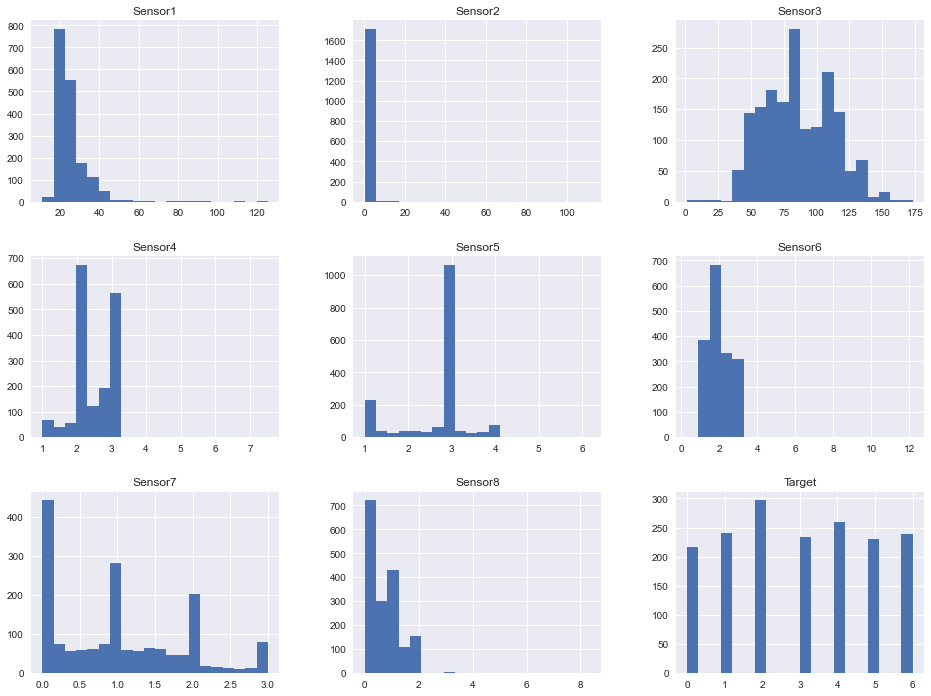

In [13]:
df_train.hist(bins=20);

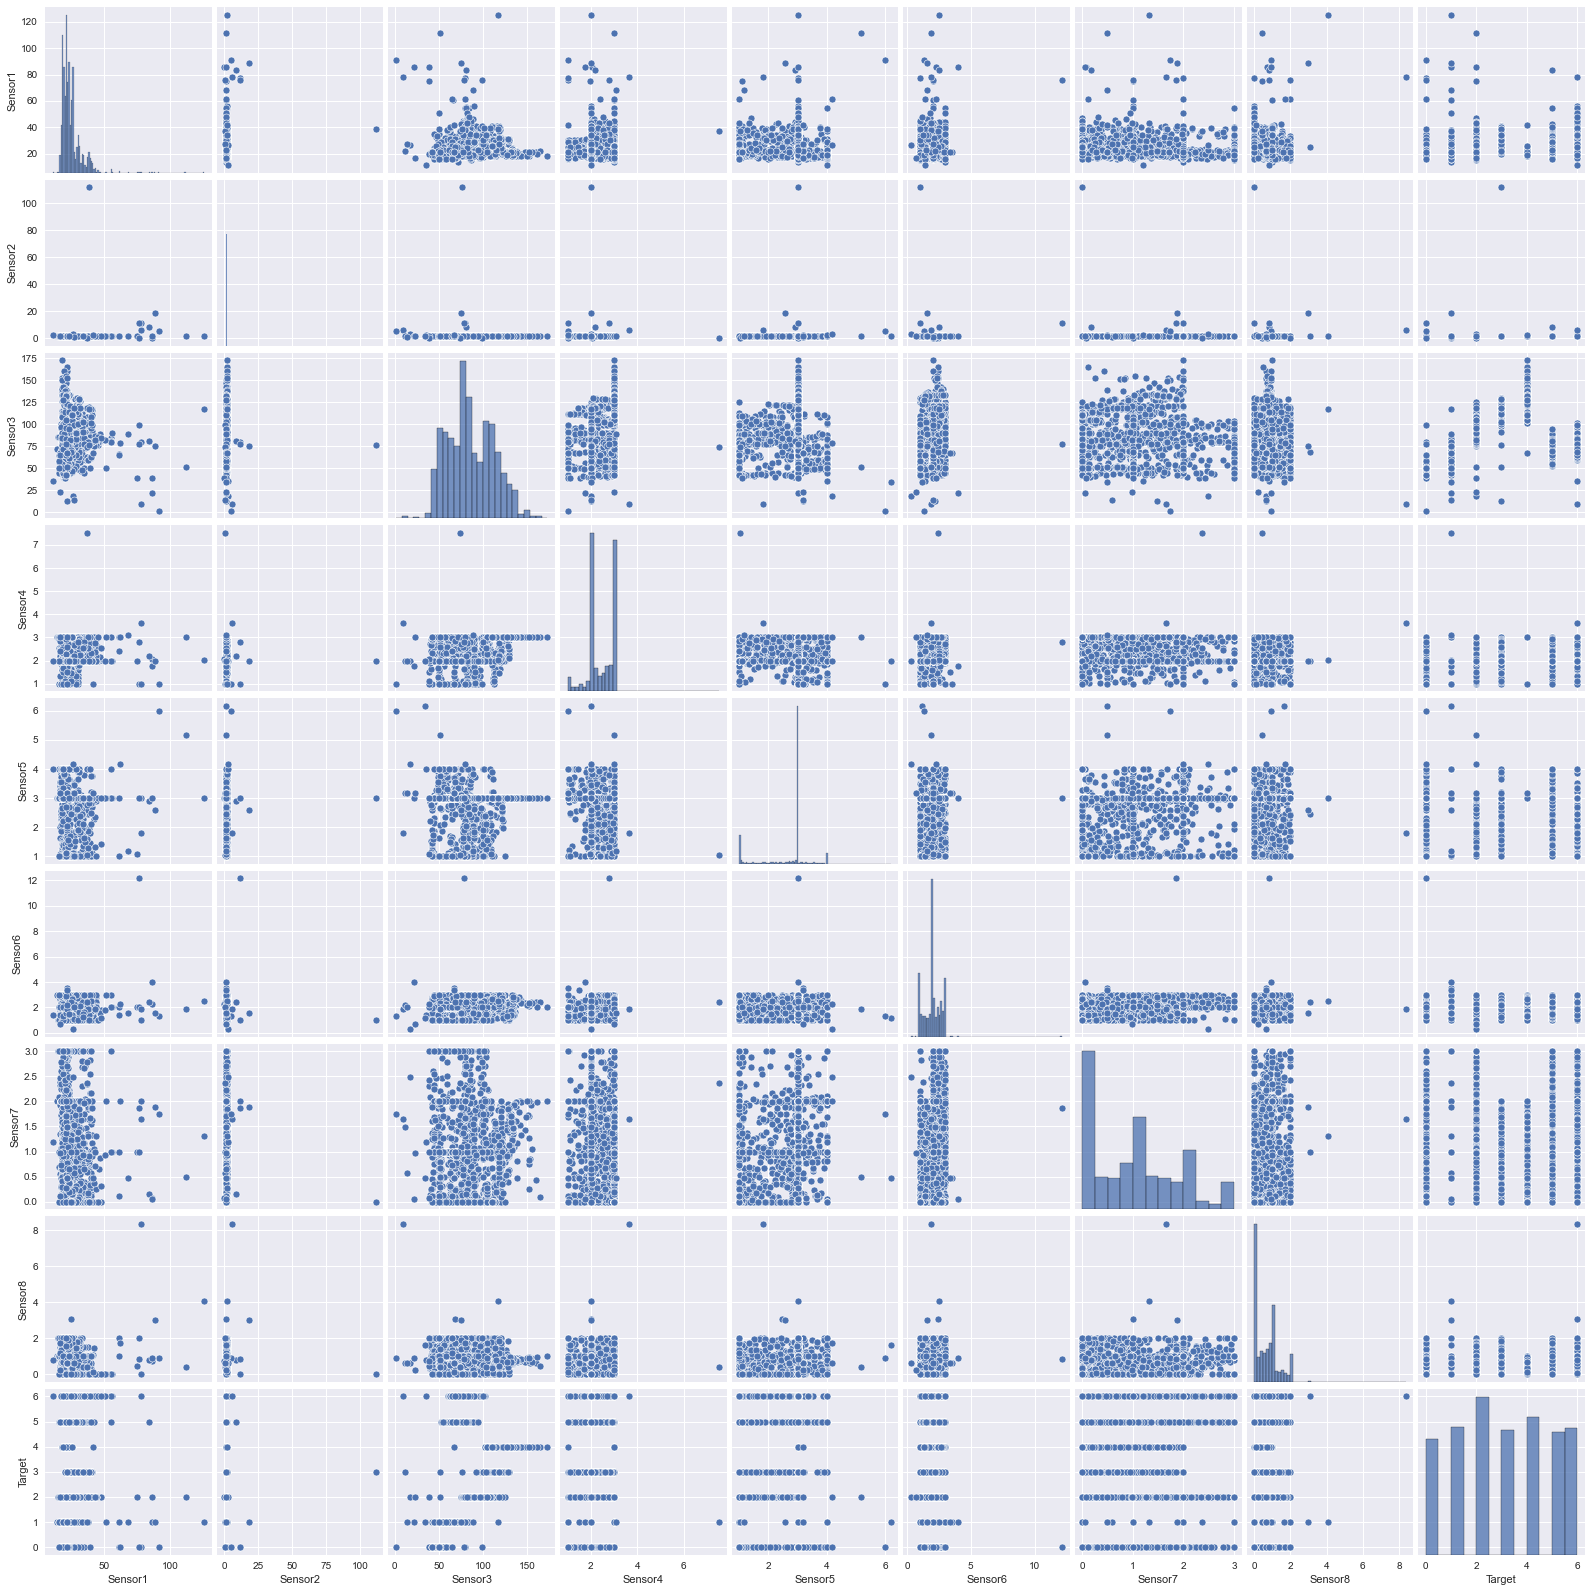

In [14]:
sns.pairplot(df_train);